# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q=" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city# YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    res = requests.get(city_url).json()
    try:
        # Parse the JSON and retrieve data
        city_weather = res# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = res["coord"]["lat"]# YOUR CODE HERE
        city_lng = res["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = res["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = res["main"]["humidity"]# YOUR CODE HERE
        city_clouds = res["clouds"]["all"]# YOUR CODE HERE
        city_wind = res["wind"]["speed"]# YOUR CODE HERE
        city_country = res["sys"]["country"]# YOUR CODE HERE
        city_date = res["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kourou
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | st. john's
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | karukh
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | playa blanca
Processing Record 8 of Set 1 | suva
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | nguigmi
Processing Record 13 of Set 1 | fortaleza
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | rongelap
Processing Record 16 of Set 1 | jayapura
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | san mariano
Processing Record 21 of Set 1 | port douglas
Processing Record 22 of S

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kourou,5.1552,-52.6478,24.03,86,45,1.95,GF,1722647698
1,port-aux-francais,-49.3500,70.2167,1.96,70,80,12.52,TF,1722647699
2,st. john's,47.5649,-52.7093,15.71,93,100,8.05,CA,1722647432
3,new norfolk,-42.7826,147.0587,12.73,71,100,1.51,AU,1722647702
4,karukh,34.4811,62.5863,20.96,38,59,5.61,AF,1722647704


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/citiesNew.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/citiesNew.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kourou,5.1552,-52.6478,24.03,86,45,1.95,GF,1722647698
1,port-aux-francais,-49.3500,70.2167,1.96,70,80,12.52,TF,1722647699
2,st. john's,47.5649,-52.7093,15.71,93,100,8.05,CA,1722647432
3,new norfolk,-42.7826,147.0587,12.73,71,100,1.51,AU,1722647702
4,karukh,34.4811,62.5863,20.96,38,59,5.61,AF,1722647704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

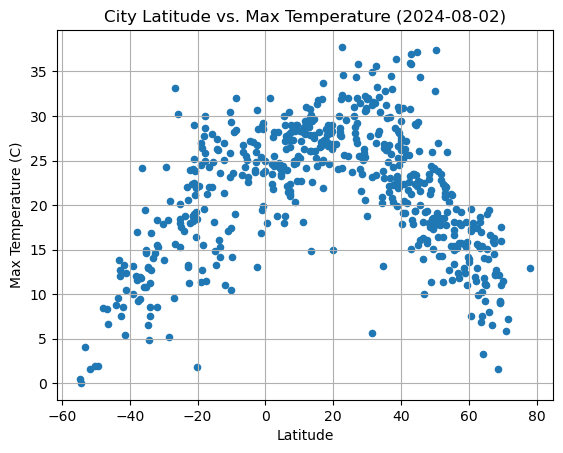

In [18]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot(kind="scatter",x="Lat",y="Max Temp")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2024-08-02)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1New.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

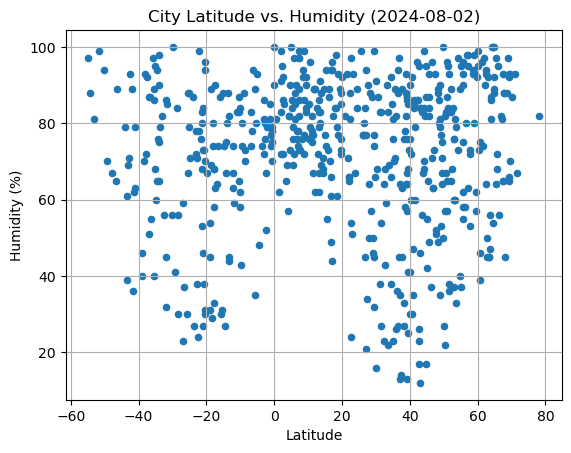

In [19]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind="scatter",x="Lat",y="Humidity")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2024-08-02)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2New.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

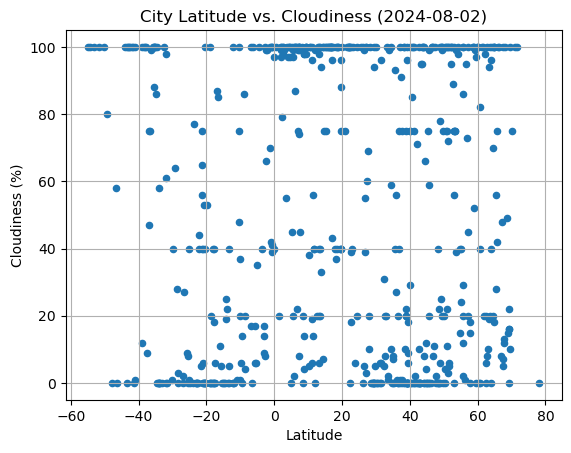

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind="scatter",x="Lat",y="Cloudiness")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2024-08-02)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3New.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

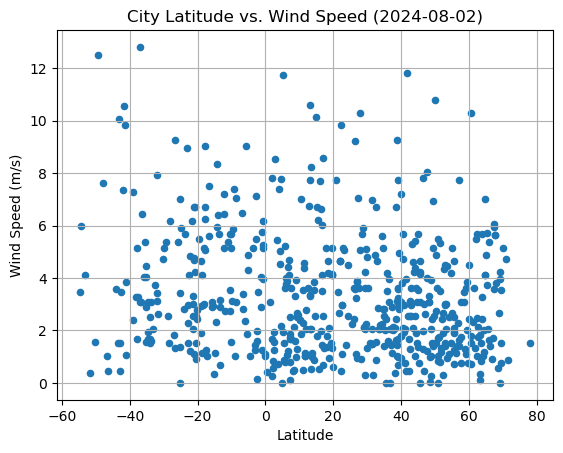

In [21]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind="scatter",x="Lat",y="Wind Speed")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2024-08-02)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("output_data/Fig4New.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linearRegFun(x,y):
    (s,b,rv,pv,stderr) = linregress(x,y)
    return s,b,rv,pv,stderr

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kourou,5.1552,-52.6478,24.03,86,45,1.95,GF,1722647698
2,st. john's,47.5649,-52.7093,15.71,93,100,8.05,CA,1722647432
4,karukh,34.4811,62.5863,20.96,38,59,5.61,AF,1722647704
5,longyearbyen,78.2186,15.6401,12.91,82,0,1.54,SJ,1722647705
6,playa blanca,28.8643,-13.8281,25.11,87,0,5.92,ES,1722647706


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,1.96,70,80,12.52,TF,1722647699
3,new norfolk,-42.7826,147.0587,12.73,71,100,1.51,AU,1722647702
7,suva,-18.1416,178.4415,27.71,74,40,5.14,FJ,1722647707
8,puerto natales,-51.7236,-72.4875,1.65,99,100,0.39,CL,1722647638
10,kruisfontein,-34.0033,24.7314,7.59,90,0,1.66,ZA,1722647711


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.39832495229086756


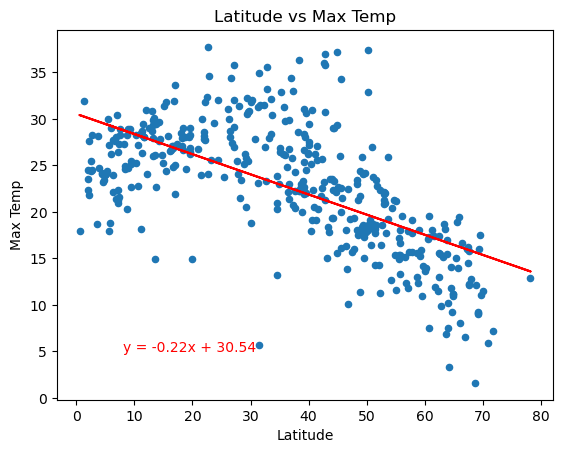

In [31]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
s,b,rv,pv,stderr = linearRegFun(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
linV = s*northern_hemi_df['Lat']+b
rSq = rv**2
print(f"The r^2-value is: {rSq}")
northern_hemi_df.plot(kind="scatter",x="Lat",y="Max Temp")
plt.plot(northern_hemi_df['Lat'],linV,'r-')
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(f"y = {round(s,2)}x + {round(b,2)}",(8,5),c='red')
plt.show()

The r^2-value is: 0.534315458832855


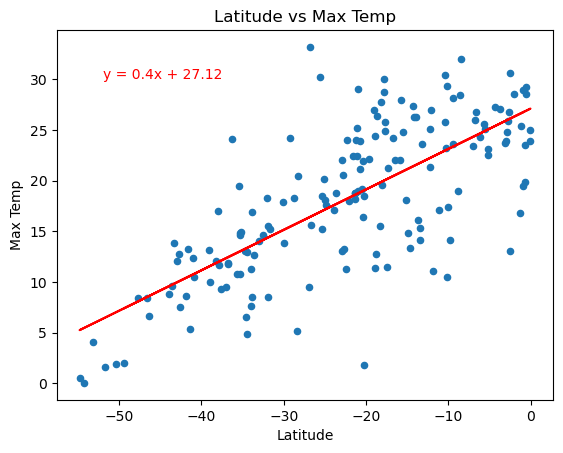

In [33]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
s,b,rv,pv,stderr = linearRegFun(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
linV = s*southern_hemi_df['Lat']+b
rSq = rv**2
print(f"The r^2-value is: {rSq}")
southern_hemi_df.plot(kind="scatter",x="Lat",y="Max Temp")
plt.plot(southern_hemi_df['Lat'],linV,'r-')
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(f"y = {round(s,2)}x + {round(b,2)}",(-52,30),c='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Big r^2 value, line fit the scatter fairly well.
Positive coorlation for southern plot.
Negative coorlation for northern plot.
Tracks for the distance away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.009065446435623205


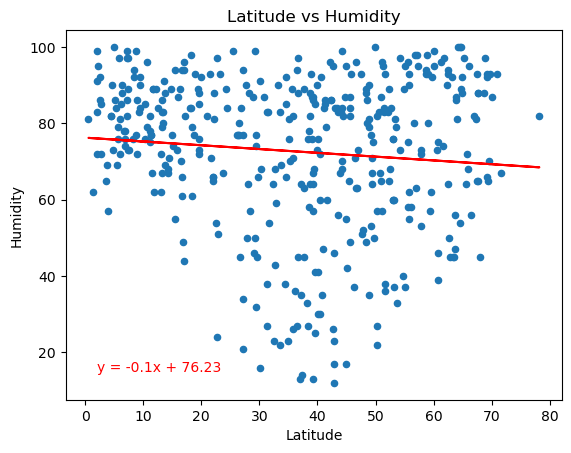

In [36]:
# Northern Hemisphere
# YOUR CODE HERE
s,b,rv,pv,stderr = linearRegFun(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
linV = s*northern_hemi_df['Lat']+b
rSq = rv**2
print(f"The r^2-value is: {rSq}")
northern_hemi_df.plot(kind="scatter",x="Lat",y="Humidity")
plt.plot(northern_hemi_df['Lat'],linV,'r-')
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(f"y = {round(s,2)}x + {round(b,2)}",(2,15),c='red')
plt.show()

The r^2-value is: 0.00015115474387496206


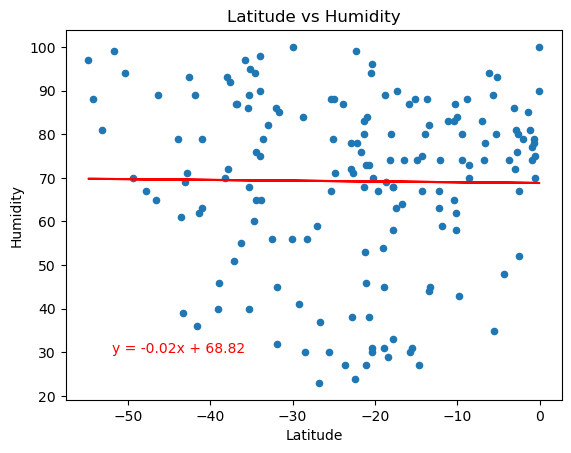

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
s,b,rv,pv,stderr = linearRegFun(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
linV = s*southern_hemi_df['Lat']+b
rSq = rv**2
print(f"The r^2-value is: {rSq}")
southern_hemi_df.plot(kind="scatter",x="Lat",y="Humidity")
plt.plot(southern_hemi_df['Lat'],linV,'r-')
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(f"y = {round(s,2)}x + {round(b,2)}",(-52,30),c='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Small r^2 value. No linear coorlation. 
Northern Plot does make sense, since there are mostly large landmasses in the North, and the plot showed a increase in Hummidity going toward the equator and the north pole with a decrease in Humidity in the middle.
Southern Hemisphere has more islands, ex: pacific islands, so the plot can make logical sense. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03799080117533737


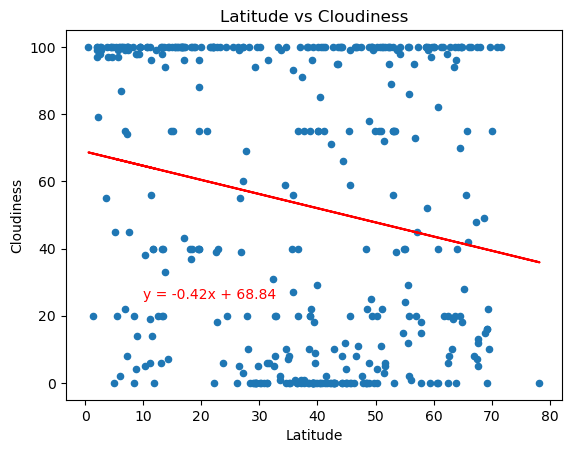

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
s,b,rv,pv,stderr = linearRegFun(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
linV = s*northern_hemi_df['Lat']+b
rSq = rv**2
print(f"The r^2-value is: {rSq}")
northern_hemi_df.plot(kind="scatter",x="Lat",y="Cloudiness")
plt.plot(northern_hemi_df['Lat'],linV,'r-')
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(f"y = {round(s,2)}x + {round(b,2)}",(10,25),c='red')
plt.show()

The r^2-value is: 0.0427748127533291


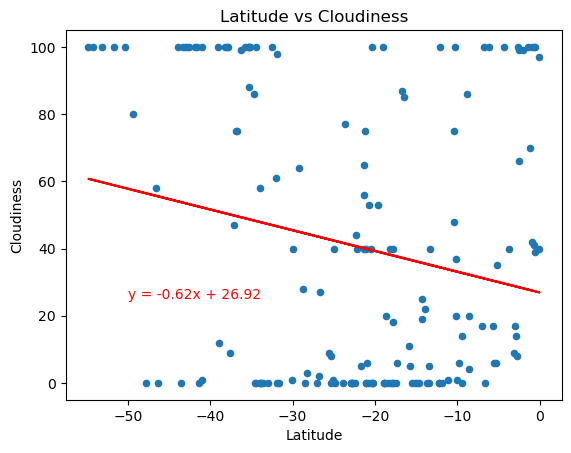

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
s,b,rv,pv,stderr = linearRegFun(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
linV = s*southern_hemi_df['Lat']+b
rSq = rv**2
print(f"The r^2-value is: {rSq}")
southern_hemi_df.plot(kind="scatter",x="Lat",y="Cloudiness")
plt.plot(southern_hemi_df['Lat'],linV,'r-')
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(f"y = {round(s,2)}x + {round(b,2)}",(-50,25),c='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Small r^2 value. Plot seem to be fairly random.  

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.005361530763504863


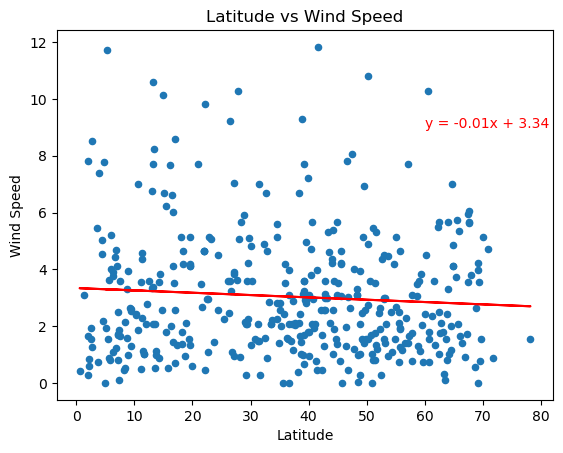

In [41]:
# Northern Hemisphere
# YOUR CODE HERE
s,b,rv,pv,stderr = linearRegFun(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
linV = s*northern_hemi_df['Lat']+b
rSq = rv**2
print(f"The r^2-value is: {rSq}")
northern_hemi_df.plot(kind="scatter",x="Lat",y="Wind Speed")
plt.plot(northern_hemi_df['Lat'],linV,'r-')
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(f"y = {round(s,2)}x + {round(b,2)}",(60,9),c='red')
plt.show()

The r^2-value is: 0.0021530135356669544


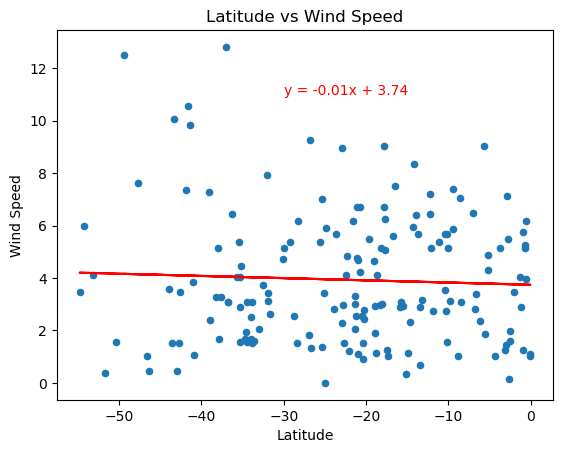

In [45]:
# Southern Hemisphere
# YOUR CODE HERE
s,b,rv,pv,stderr = linearRegFun(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
linV = s*southern_hemi_df['Lat']+b
rSq = rv**2
print(f"The r^2-value is: {rSq}")
southern_hemi_df.plot(kind="scatter",x="Lat",y="Wind Speed")
plt.plot(southern_hemi_df['Lat'],linV,'r-')
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(f"y = {round(s,2)}x + {round(b,2)}",(-30,11),c='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Low r^2 value. No real coorlation. Plot seem fairly random